In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.decomposition import PCA
import scipy.stats as stats

# Exercice 1

## Create python script to manage these tables as data frames.

In [2]:
table1 = pd.DataFrame({
    'Company':['Djeezy','Mobilis'],
    'N customers':[10000000,9000000],
    'Rating mean':[7.5,4],
    'year':[ 2018,2019]
},index=[1,2])

table2 = pd.DataFrame({
    'Company':['Ooredoo','Mobilis'],
    'N customers':[11000000,9000000],
    'Rating mean':[8,4],
    'year':[ 2020,2021]
},index=[1,2])

table3 = pd.DataFrame({
    'Company':['Ooredoo','Mobilis','Ooredoo'],
    'Expected revenues':['12000000 DA','10800000 DA','17000000 DA'],
    'year':[ 2023,2023,2024]
},index=[1,2,1])

In [3]:
table1

,Company,N customers,Rating mean,year
1,Djeezy,10000000,7.5,2018
2,Mobilis,9000000,4.0,2019


In [4]:
table2

,Company,N customers,Rating mean,year
1,Ooredoo,11000000,8,2020
2,Mobilis,9000000,4,2021


In [5]:
table3

,Company,Expected revenues,year
1,Ooredoo,12000000 DA,2023
2,Mobilis,10800000 DA,2023
1,Ooredoo,17000000 DA,2024


## table1 and table 2 concat

In [6]:
all_inf = pd.concat([table1,table2])
all_inf

,Company,N customers,Rating mean,year
1,Djeezy,10000000,7.5,2018
2,Mobilis,9000000,4.0,2019
1,Ooredoo,11000000,8.0,2020
2,Mobilis,9000000,4.0,2021


In [7]:
sorted_all_inf_by_time = all_inf.sort_values(by=['year'])
recent_inf = sorted_all_inf_by_time.drop_duplicates(subset='Company',keep='last')
recent_inf

,Company,N customers,Rating mean,year
1,Djeezy,10000000,7.5,2018
1,Ooredoo,11000000,8.0,2020
2,Mobilis,9000000,4.0,2021


In [8]:
keep_name_n_customers = all_inf.loc[:,["Company",'N customers']].drop_duplicates()
4

4

## Megin table 3

In [9]:
mergin_respect_year_company=all_inf.merge(table3,left_on=['Company','year'],right_on=['Company','year'])
mergin_respect_year_company

,Company,N customers,Rating mean,year,Expected revenues


In [10]:
mergin_respect_company=recent_inf.merge(table3,left_on='Company',right_on='Company')
mergin_respect_company

,Company,N customers,Rating mean,year_x,Expected revenues,year_y
0,Ooredoo,11000000,8.0,2020,12000000 DA,2023
1,Ooredoo,11000000,8.0,2020,17000000 DA,2024
2,Mobilis,9000000,4.0,2021,10800000 DA,2023


## For the available information, draw a graph representing the company, the year, and the expected revenues of each.

In [11]:
mergin_respect_company
data2plot=mergin_respect_company.loc[:,["Company","year_x","year_y","Expected revenues"]]
data2plot

,Company,year_x,year_y,Expected revenues
0,Ooredoo,2020,2023,12000000 DA
1,Ooredoo,2020,2024,17000000 DA
2,Mobilis,2021,2023,10800000 DA


In [12]:
#turnig expected revenues to  numeric
data2plot["Expected revenues"] = data2plot["Expected revenues"].map(lambda x : x.split(' ')[0]).astype('float')

In [13]:
# reshaping data 
pivoted_data=data2plot.pivot(index="Company",columns='year_y',values='Expected revenues')
pivoted_data

year_y,2023,2024
Company,,
Mobilis,10800000.0,NaN
Ooredoo,12000000.0,17000000.0


In [14]:
pivoted_data.columns.size

2

[Text(0, 0, '2023'), Text(1, 0, '2024')]

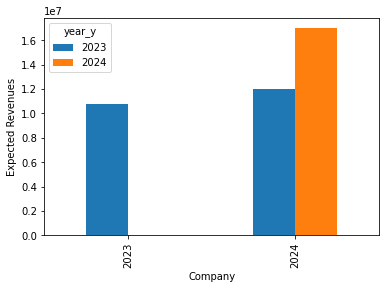

In [15]:
#grouped bar plot
ax = pivoted_data.plot(kind='bar')
ax.set_ylabel('Expected Revenues')
ax.set_xticks(np.asanyarray([i for i in range(pivoted_data.columns.size)]))
ax.set_xticklabels(pivoted_data.columns)
#need to work more on visualisation

## If we consider that Ooredoo revenues grow up linearly, draw a line that represents the increase of revenues and calculate the expected revenue by 2025.


year_y
2023    12000000.0
2024    17000000.0
Name: Ooredoo, dtype: float64


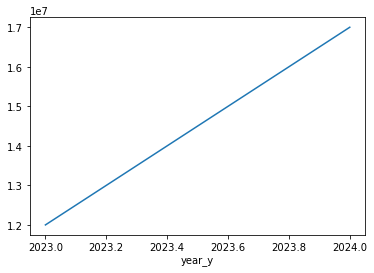

In [25]:
ooredoo_expcetations = pivoted_data.loc['Ooredoo',:]
oredo_ax=ooredoo_expcetations.plot()
oredo_ax.set_xlim()
print(ooredoo_expcetations)

In [74]:
#performin linear regression to predict expectatations in 2025
X=ooredoo_expcetations.index.values
X=X.reshape((2,1))
Y= ooredoo_expcetations.iloc[:]
model = linear_model.LinearRegression()
#train the model
model.fit(X,Y)
prediction=model.predict([[2025]])
print(f'expected revenues for ooredoo by 2025 are {prediction}')

expected revenues for ooredoo by 2025 are [22000000.]


In [87]:
prediction

array([22000000.])

In [93]:
ooredoo_expcetations[2025]=prediction[0]

<AxesSubplot:xlabel='year_y'>

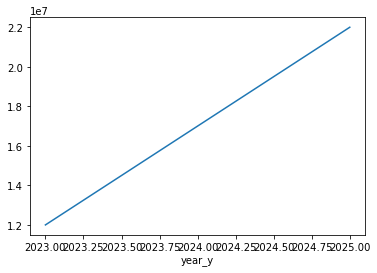

In [95]:
  ooredoo_expcetations.plot()

# EX2

## Let us consider the IRIS dataset (the CSV format). Implement using python the next statistical measures:

In [96]:
iris_data = pd.read_csv('./Iris.csv')
iris_data.set_index('Id',inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Min, max, mode, median, standard deviation.


In [166]:
def my_describe(data):
    calculable_indexes = [ x  for x in data.columns if data.loc[:,x].dtype == 'float64']
    data = data[calculable_indexes]
    stat_df = pd.DataFrame({
    'min':[data.loc[:,x].min() for x in data.columns],
    'max':[data.loc[:,x].max() for x in data.columns],    
    'mode':[data.loc[:,x].mode()[0] for x in data.columns],
    'median':[data.loc[:,x].median() for x in data.columns],
    'standard deviation':[data.loc[:,x].std() for x in data.columns],
  },index =calculable_indexes)
    return stat_df

In [167]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [168]:
my_describe(iris_data)

,min,max,mode,median,standard deviation
SepalLengthCm,4.3,7.9,5.0,5.80,0.828066
SepalWidthCm,2.0,4.4,3.0,3.00,0.433594
PetalLengthCm,1.0,6.9,1.5,4.35,1.764420
PetalWidthCm,0.1,2.5,0.2,1.30,0.763161


## Normalize the data using Z-score.

In [190]:
def z_score(col):
    try:
        return stats.zscore(col)
    except:
        return col
    

In [194]:
normalized_iris=iris_data.apply(lambda x: z_score(x))
normalized_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica


## Calculate the correlation table (correlation of each two variables.).

In [201]:
correlations=iris_data.corr()
correlations

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Visulizing Correlation

<AxesSubplot:>

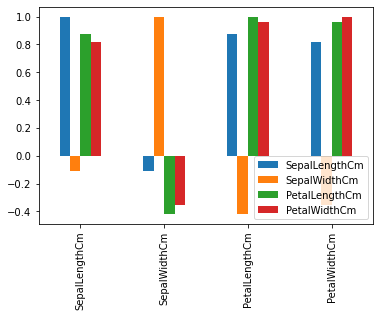

In [203]:
correlations.plot(kind='bar')


In [204]:
#we can conduct PetalLength and width and sepalLength are corelated
#so i think that we can kepp one or two of theme

## Apply PCA on the Data and keep only the two most significant dimensions. 
## a. Visualize the correlation of each two new variables.
## b. What do you conduct?

In [214]:
pca = PCA(n_components=2)
pca_data=pca.fit_transform(normalized_iris[[x for x in normalized_iris.columns if normalized_iris[x].dtype =='float64']])

In [216]:
pc_data = pd.DataFrame(data=pca_data,columns=['PC 1','PC 2'])
pc_data

,PC 1,PC 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [218]:
pc_data.corr()

,PC 1,PC 2
PC 1,1.000000e+00,-6.906984e-17
PC 2,-6.906984e-17,1.000000e+00


# EX3